In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
sns.set_style('whitegrid')

In [2]:
# Load the wholesale customers dataset
data = pd.read_csv("Customer_data.csv")
data.drop(['Region', 'Channel'], axis = 1, inplace = True)
print("The Customers dataset has {} samples with {} features each.".format(*data.shape))
print()
print('Columns:')
display(data.columns)
display(data.head(5))

The Customers dataset has 440 samples with 6 features each.

Columns:


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [3]:
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
#As we know Quartile 1 of Milk ends at value 1533, quartile 3 of Fresh ends at 16933.75,
# quartile 1 of grocery ends at 2153 and quartile 3 of Frozen ends at 3554.25 
display(data.query('Milk < 1533 and Fresh > 16933.75').head(5))
display(data.query('Grocery < 2153 and Fresh > 16933.75').head(5))
display(data.query('Grocery < 2153 and Frozen > 3554.25').head(5))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
32,21632,1318,2886,266,918,405
39,56159,555,902,10002,212,2916
54,27329,1449,1947,2436,204,1333
71,18291,1266,21042,5373,4173,14472
75,20398,1137,3,4407,3,975


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,56159,555,902,10002,212,2916
54,27329,1449,1947,2436,204,1333
75,20398,1137,3,4407,3,975
83,20874,1563,1783,2320,550,772
114,18044,1080,2000,2555,118,1266


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
39,56159,555,902,10002,212,2916
50,6269,1095,1980,3860,609,2162
75,20398,1137,3,4407,3,975
93,11314,3090,2062,35009,71,2698
99,9658,2182,1909,5639,215,323


In [5]:
""""
Lets take the following values as samples:
    1. Loc 39 as it shows very high fresh and very low milk
    2. Loc 75 as it shows high fresh and very low Grocery
    3. Loc 93 as it shows less Grocery and very high Frozen
"""

indices = [39, 75, 93]

sample_data = pd.DataFrame(data.loc[indices], columns = data.columns).reset_index(drop = True)
display(sample_data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159,555,902,10002,212,2916
1,20398,1137,3,4407,3,975
2,11314,3090,2062,35009,71,2698


Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159.000000,555.000000,902.000000,10002.000000,212.000000,2916.000000
1,20398.000000,1137.000000,3.000000,4407.000000,3.000000,975.000000
2,11314.000000,3090.000000,2062.000000,35009.000000,71.000000,2698.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455


Index([39, 75, 93, 'mean'], dtype='object')

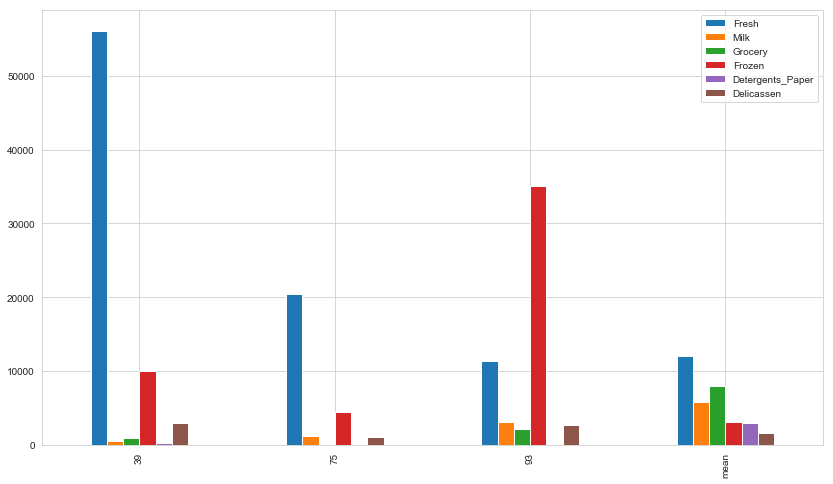

In [6]:
mean_data = data.describe().loc['mean', :]
display(mean_data)
samples_bar = sample_data.append(mean_data)
display(samples_bar)
samples_bar.index = indices + ['mean']
display(samples_bar.index)
display(samples_bar.plot(kind='bar', figsize=(14,8)))

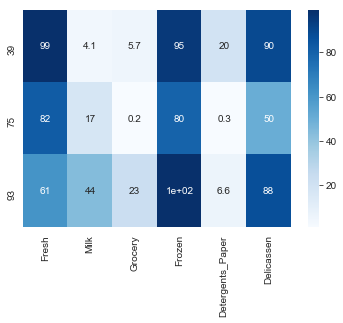

In [7]:
percentiles = data.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
display(sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, cmap='Blues'))

### Feature relevance

In [8]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [9]:
data.columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'], dtype='object')

In [10]:
# Create list to loop through
dep_vars = list(data.columns)


# Create loop to test each feature as a dependent variable
for var in dep_vars:
    
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([var], axis = 1)
    # Confirm drop
    # display(new_data.head(2))

    # Create feature Series (Vector)
    new_feature = pd.DataFrame(data.loc[:, var])
    # Confirm creation of new feature
    # display(new_feature.head(2))

    # TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, new_feature, test_size=0.25, random_state=42)

    # TODO: Create a decision tree regressor and fit it to the training set
    # Instantiate
    dtr = DecisionTreeRegressor(random_state=42)
    # Fit
    dtr.fit(X_train, y_train)

    # TODO: Report the score of the prediction using the testing set
    # Returns R^2
    score = dtr.score(X_test, y_test)
    print('R2 score for {} as dependent variable: {}'.format(var, score))

R2 score for Fresh as dependent variable: -0.38574971020407384
R2 score for Milk as dependent variable: 0.15627539501732116
R2 score for Grocery as dependent variable: 0.6818840085440834
R2 score for Frozen as dependent variable: -0.21013589012491396
R2 score for Detergents_Paper as dependent variable: 0.27166698062685013
R2 score for Delicassen as dependent variable: -2.254711537203931


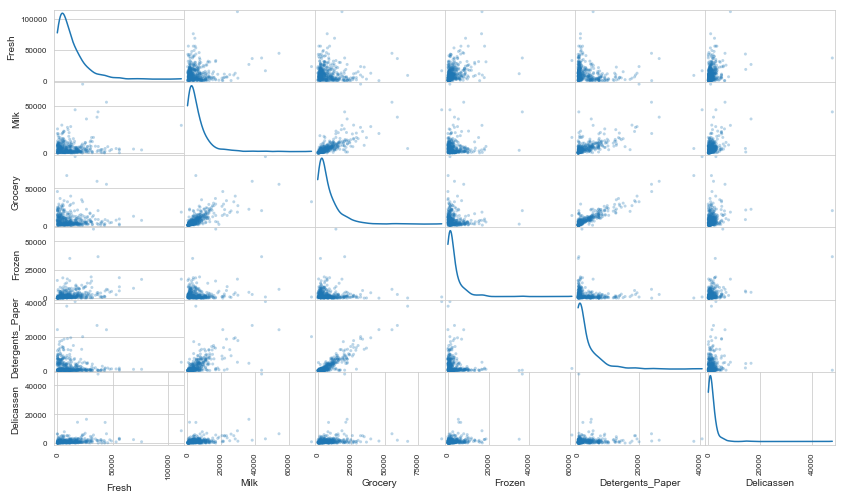

In [11]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Visualize Feature distribution

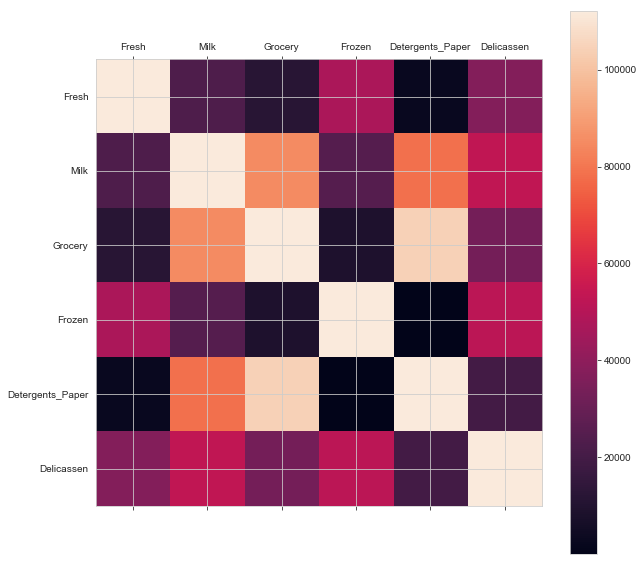

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')  
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    

plot_corr(data)

### Data Preprocessing, Feature scaling (applying natural logarithmic func)

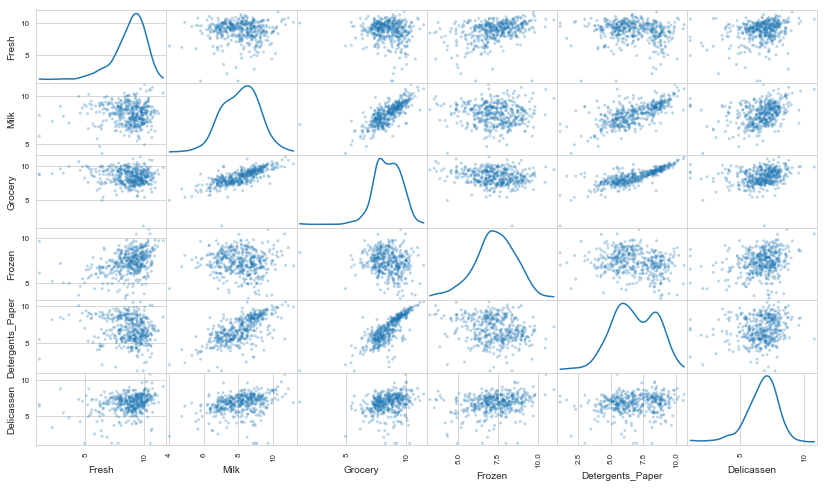

In [13]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_sample_data = np.log(sample_data)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [14]:
display(sample_data)
display(log_sample_data)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159,555,902,10002,212,2916
1,20398,1137,3,4407,3,975
2,11314,3090,2062,35009,71,2698


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,10.935942,6.318968,6.804615,9.210540,5.356586,7.977968
1,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
2,9.333796,8.035926,7.631432,10.463360,4.262680,7.900266


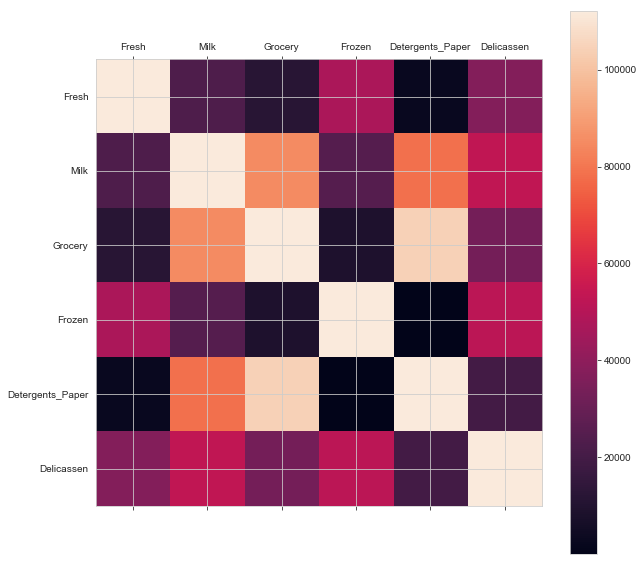

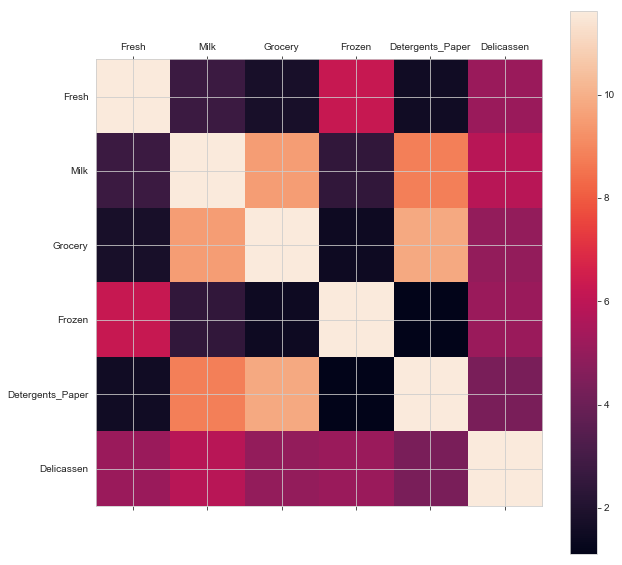

In [15]:
plot_corr(data)
plot_corr(log_data)

### Outlier Detection

In [16]:
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
   # print "Data points considered outliers for the feature '{}':".format(feature)
    
    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))
        
outliers = list(itertools.chain.from_iterable(outliers_lst))

In [17]:
len(outliers)

48

In [18]:
# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))
len(uniq_outliers)

42

In [19]:
# Select the indices for data points you wish to remove
outliers_lst  = []

# For each feature find the data points with extreme high or low values
for feature in log_data.columns:
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data.loc[:, feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data.loc[:, feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    
    # The tilde sign ~ means not
    # So here, we're finding any points outside of Q1 - step and Q3 + step
    outliers_rows = log_data.loc[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step)), :]
    # display(outliers_rows)

    outliers_lst.append(list(outliers_rows.index))
        
outliers = list(itertools.chain.from_iterable(outliers_lst))

# List of unique outliers
# We use set()
# Sets are lists with no duplicate entries
uniq_outliers = list(set(outliers))
        
# List of duplicate outliers
dup_outliers = list(set([x for x in outliers if outliers.count(x) > 1]))
        
print('Outliers list:\n', uniq_outliers)
print('Length of outliers list:\n', len(uniq_outliers))

print('Duplicate list:\n', dup_outliers)
print('Length of duplicates list:\n', len(dup_outliers))

# Remove duplicate outliers
# Only 5 specified
good_data = log_data.drop(log_data.index[dup_outliers]).reset_index(drop = True)

# Original Data 
print('Original shape of data:\n', data.shape)
# Processed Data
print('New shape of data:\n', good_data.shape)

Data points considered outliers for the feature 'Fresh':
Data points considered outliers for the feature 'Milk':
Data points considered outliers for the feature 'Grocery':
Data points considered outliers for the feature 'Frozen':
Data points considered outliers for the feature 'Detergents_Paper':
Data points considered outliers for the feature 'Delicassen':
Outliers list:
 [128, 264, 137, 142, 145, 154, 412, 285, 161, 289, 420, 38, 171, 429, 175, 304, 305, 439, 183, 57, 184, 187, 65, 66, 193, 325, 75, 203, 81, 338, 86, 343, 218, 95, 96, 353, 98, 355, 356, 357, 233, 109]
Length of outliers list:
 42
Duplicate list:
 [128, 65, 66, 75, 154]
Length of duplicates list:
 5
Original shape of data:
 (440, 6)
New shape of data:
 (435, 6)


Only 2 dimensions are contributing maximum to the variance of the dataset, which is almost 90 percent. hence we have reduced the dimensions from six to 2, the 4 variables we have removed were dependent on each other and were not contributing enoguh to the variance of the dataset.

### Feature Transformation, implementation of PCA

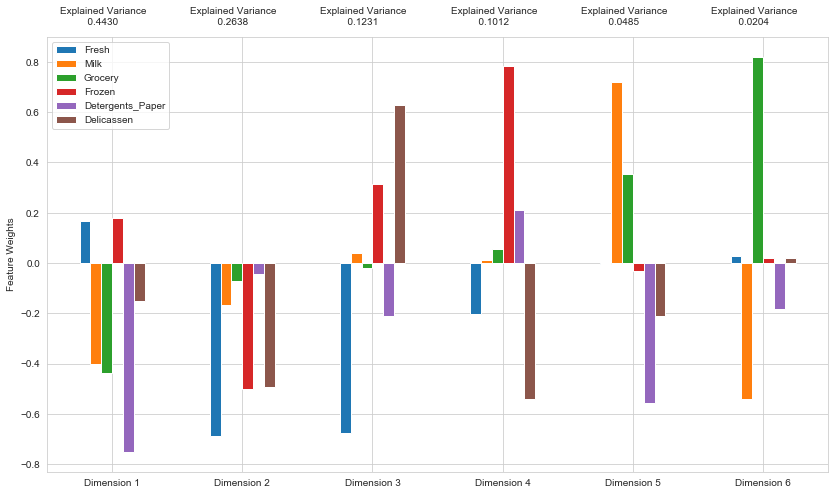

In [24]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
# Instantiate
pca = PCA(n_components=6)
# Fit
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_sample_data)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

In [25]:
# DataFrame of results
display(pca_results)

# DataFrame
display(type(pca_results))

# Cumulative explained variance should add to 1
display(pca_results['Explained Variance'].cumsum())

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Dimension 1,0.4430,0.1675,-0.4014,-0.4381,0.1782,-0.7514,-0.1499
Dimension 2,0.2638,-0.6859,-0.1672,-0.0707,-0.5005,-0.0424,-0.4941
Dimension 3,0.1231,-0.6774,0.0402,-0.0195,0.3150,-0.2117,0.6286
Dimension 4,0.1012,-0.2043,0.0128,0.0557,0.7854,0.2096,-0.5423
Dimension 5,0.0485,-0.0026,0.7192,0.3554,-0.0331,-0.5582,-0.2092
Dimension 6,0.0204,0.0292,-0.5402,0.8205,0.0205,-0.1824,0.0197


pandas.core.frame.DataFrame

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64

In [26]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,3.0426,-2.5854,0.1965,-0.0757,-1.4213,0.0093
1,8.3026,-0.4747,0.9774,-1.1195,-0.2977,-4.3514
2,2.7797,-2.3743,1.9121,1.1165,0.6970,-0.0627


### Dimensionality reduction

In [28]:
# TODO: Apply PCA by fitting the good data with only two dimensions
# Instantiate
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_sample_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [29]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,3.0426,-2.5854
1,8.3026,-0.4747
2,2.7797,-2.3743


### Clustering

In [30]:
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
# Create range of clusters 
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [33]:
# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = GMM(n_components=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='mahalanobis')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.3761556577675909
For n_clusters = 3. The average silhouette_score is : 0.36638738533011384
For n_clusters = 4. The average silhouette_score is : 0.29125003436899205
For n_clusters = 5. The average silhouette_score is : 0.2945395206063453
For n_clusters = 6. The average silhouette_score is : 0.2637463115129096
For n_clusters = 7. The average silhouette_score is : 0.33252668232739385
For n_clusters = 8. The average silhouette_score is : 0.3044872698274151
For n_clusters = 9. The average silhouette_score is : 0.29998540133633345
For n_clusters = 10. The average silhouette_score is : 0.3138144587326109


lowest_bic = np.infty
bic = []
n_components_range = range(1, 7)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians mwith EM
        gmm = GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(X)
        bic.append(gmm.bic(X))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [35]:

# Loop through clusters
for n_clusters in range_n_clusters:
    # TODO: Apply your clustering algorithm of choice to the reduced data 
    clusterer = KMeans(n_clusters=n_clusters).fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)

    # TODO: Find the cluster centers
    centers = clusterer.cluster_centers_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {}".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.42628101546910835
For n_clusters = 3. The average silhouette_score is : 0.3588363649948436
For n_clusters = 4. The average silhouette_score is : 0.3312668793781987
For n_clusters = 5. The average silhouette_score is : 0.34956821609929706
For n_clusters = 6. The average silhouette_score is : 0.3550750427851982
For n_clusters = 7. The average silhouette_score is : 0.36350322430458637
For n_clusters = 8. The average silhouette_score is : 0.3520710199685826
For n_clusters = 9. The average silhouette_score is : 0.3630952148878974
For n_clusters = 10. The average silhouette_score is : 0.34957220941692446


In [36]:

# Extra code because we ran a loop on top and this resets to what we want
clusterer = GMM(n_components=2).fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.means_
sample_preds = clusterer.predict(pca_samples)

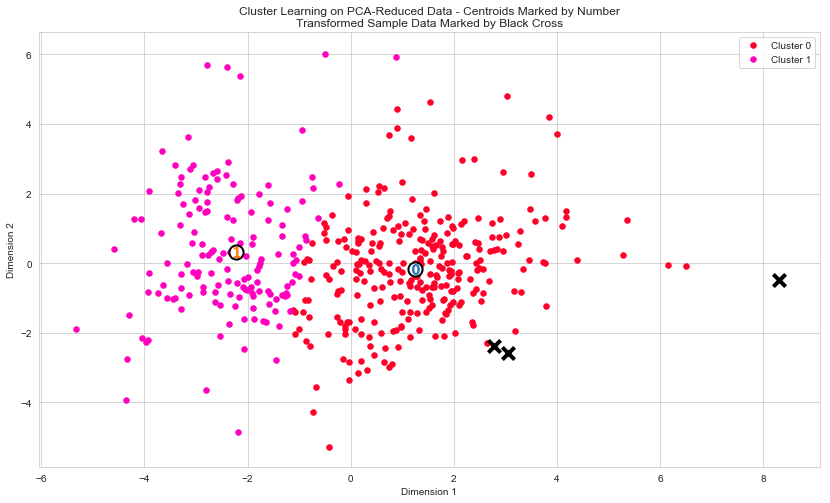

In [37]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Data Recovery

In [38]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.columns)
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0


In [39]:
# Clusters' deviation from median
display(true_centers - data.median())

# Clusters' deviation from mean
# As you can see, this is not a meaningful comparison for Segment 1 where everything is negative
display(true_centers - data.mean())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,449.0,-1513.0,-1990.5,549.0,-463.5,-233.5
Segment 1,-4952.0,4210.0,7463.5,-656.0,3879.5,-3.5


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Segment 0,-3047.297727,-3682.265909,-5186.277273,-996.931818,-2528.493182,-792.870455
Segment 1,-8448.297727,2040.734091,4267.722727,-2201.931818,1814.506818,-562.870455


In [40]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


In [41]:
sample_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,56159,555,902,10002,212,2916
1,20398,1137,3,4407,3,975
2,11314,3090,2062,35009,71,2698


In [42]:
dup_outliers

[128, 65, 66, 75, 154]

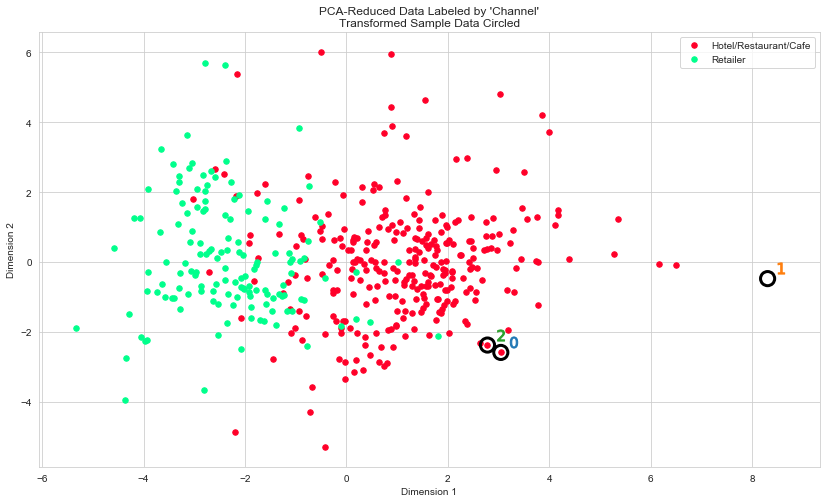

In [43]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data,dup_outliers, pca_samples)